### Student Performance Indicator

Life cycle of Machine learning Project

    Understanding the Problem Statement
    Data Collection
    Data Checks to perform
    Exploratory data analysis
    Data Pre-Processing
    Model Training
    Choose best model

1) Problem statement

    This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

2) Data Collection

    Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
    The data consists of 8 column and 1000 rows.

2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.


In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the CSV as a Pandas DataFrame.


In [28]:
df = pd.read_csv('stud.csv')


In [29]:
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##
2.2 Dataset information

    - Gender : sex of students -> (Male/female)
    - race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
    - parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
    - lunch : having lunch before test (standard or free/reduced)
    - test preparation course : complete or not complete before test
    - math score
    - reading score
    - writing score

3. Data Checks to perform

    - Check Missing values
    - Check Duplicates
    - Check data type
    - Check the number of unique values of each column
    - Check statistics of data set
    - Check various categories present in the different categorical column



3.1 Check Missing values


In [30]:
df.isna().sum()


gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the dataset.


3.2 Check Duplicates


In [31]:
df.duplicated().sum()


np.int64(0)

There are no duplicates in the dataset.


3.3 Check data type


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


3.4 Check the number of unique values of each column


In [33]:
df.nunique()


gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

3.5 Check statistics of data set

In [34]:
df.describe()


,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights from the data set:

- We can see that the scores mean and standard deviation are close to each other.
- There is resemblance in all of the test scores.


3.7 Exploring the data set


In [35]:
print("Categories in Gender: ", df['gender'].unique())
print("Categories in race/ethnicity: ", df['race_ethnicity'].unique())
print("Categories in parental level of education: ", df['parental_level_of_education'].unique())
print("Categories in lunch: ", df['lunch'].unique())
print("Categories in test preparation course: ", df['test_preparation_course'].unique())


Categories in Gender:  ['female' 'male']
Categories in race/ethnicity:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch:  ['standard' 'free/reduced']
Categories in test preparation course:  ['none' 'completed']


We have the following categories in the data set:

- Gender: Male, Female
- Race/ethnicity: Group A, B, C, D, E
- Parental level of education: Bachelor's degree, Some college, Master's degree, Associate's degree, High school
- Lunch: Standard, Free/reduced
- Test preparation course: None, Completed


In [36]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print("Numerical Features: ", numerical_features)
print("Categorical Features: ", categorical_features)


Numerical Features:  ['math_score', 'reading_score', 'writing_score']
Categorical Features:  ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


3.8 Adding Cloumns for "total score" and "average score"

In [37]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score'] / 3

df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [38]:
reading_full = (df['reading_score'] == 100).sum()
math_full = (df['math_score'] == 100).sum()
writing_full = (df['writing_score'] == 100).sum()

print("Number of students who scored full marks in reading: ", reading_full)
print("Number of students who scored full marks in math: ", math_full)
print("Number of students who scored full marks in writing: ", writing_full)



Number of students who scored full marks in reading:  17
Number of students who scored full marks in math:  7
Number of students who scored full marks in writing:  14


In [39]:
reading_full = (df['reading_score'] < 20).sum()
math_full = (df['math_score'] < 20).sum()
writing_full = (df['writing_score'] < 20).sum()

print("Number of students who scored less than 20 in reading: ", reading_full)
print("Number of students who scored less than 20 in math: ", math_full)
print("Number of students who scored less than 20 in writing: ", writing_full)


Number of students who scored less than 20 in reading:  1
Number of students who scored less than 20 in math:  4
Number of students who scored less than 20 in writing:  3


Insights:

- There are 17 students who scored full marks in reading.
- There are 7 students who scored full marks in math.
- There are 14 students who scored full marks in writing.

Students have generally scored less in maths compared to reading and writing.




# 4. Exploring Data with Visualization

4.1 Visualize average score distribution to make some conclusion.

    - Histogram
    - Kernel Distribution Function (KDE)


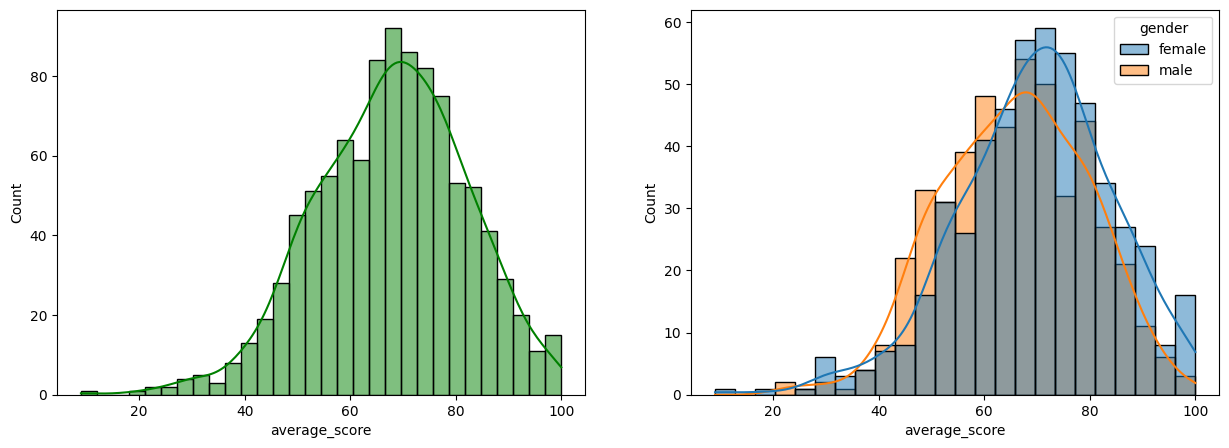

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(121)
sns.histplot(data = df, x = 'average_score', bins= 30, kde = True, color = 'g')
plt.subplot(122)
sns.histplot(data = df, x = 'average_score', kde = True, hue = 'gender')
plt.show()



Insights:

- Female students tend to perform better than male students.
- The average score is right-skewed indicating students are more likely to score higher.



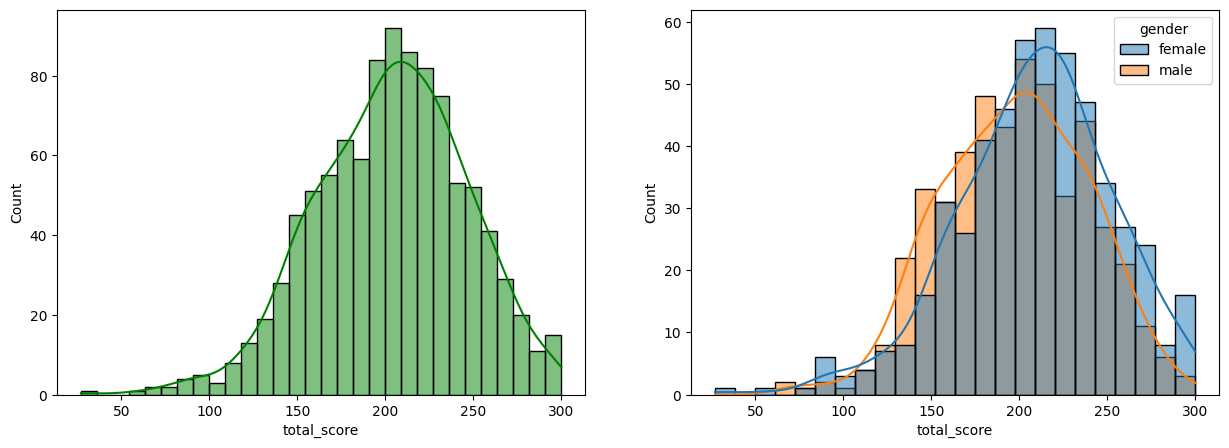

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(121)
sns.histplot(data = df, x = 'total_score', bins= 30, kde = True, color = 'g')
plt.subplot(122)
sns.histplot(data = df, x = 'total_score', kde = True, hue = 'gender')
plt.show()


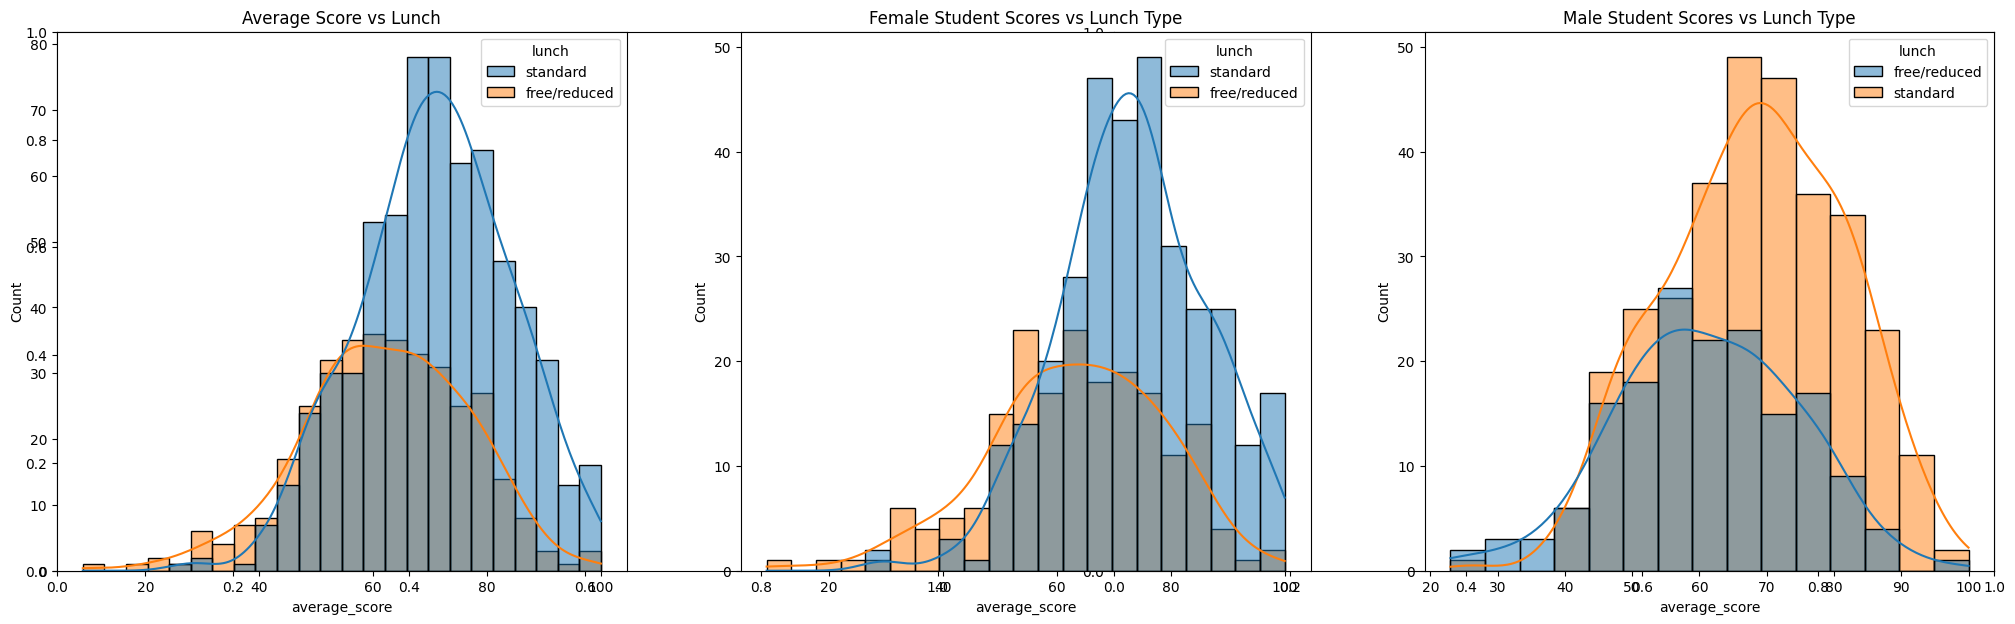

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(25, 7))
plt.subplot(131)
sns.histplot(data = df, x = 'average_score', kde = True, hue = 'lunch')
plt.title("Average Score vs Lunch")
plt.subplot(132)
sns.histplot(data = df[df.gender == 'female'], x = 'average_score', kde = True, hue = 'lunch')
plt.title("Female Student Scores vs Lunch Type")
plt.subplot(133)
sns.histplot(data = df[df.gender == 'male'], x = 'average_score', kde = True, hue = 'lunch')
plt.title("Male Student Scores vs Lunch Type")

plt.show()

We can conclude that Standard Lunch helps perform well in exam for both male and female students

In [43]:
df["parental_level_of_education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

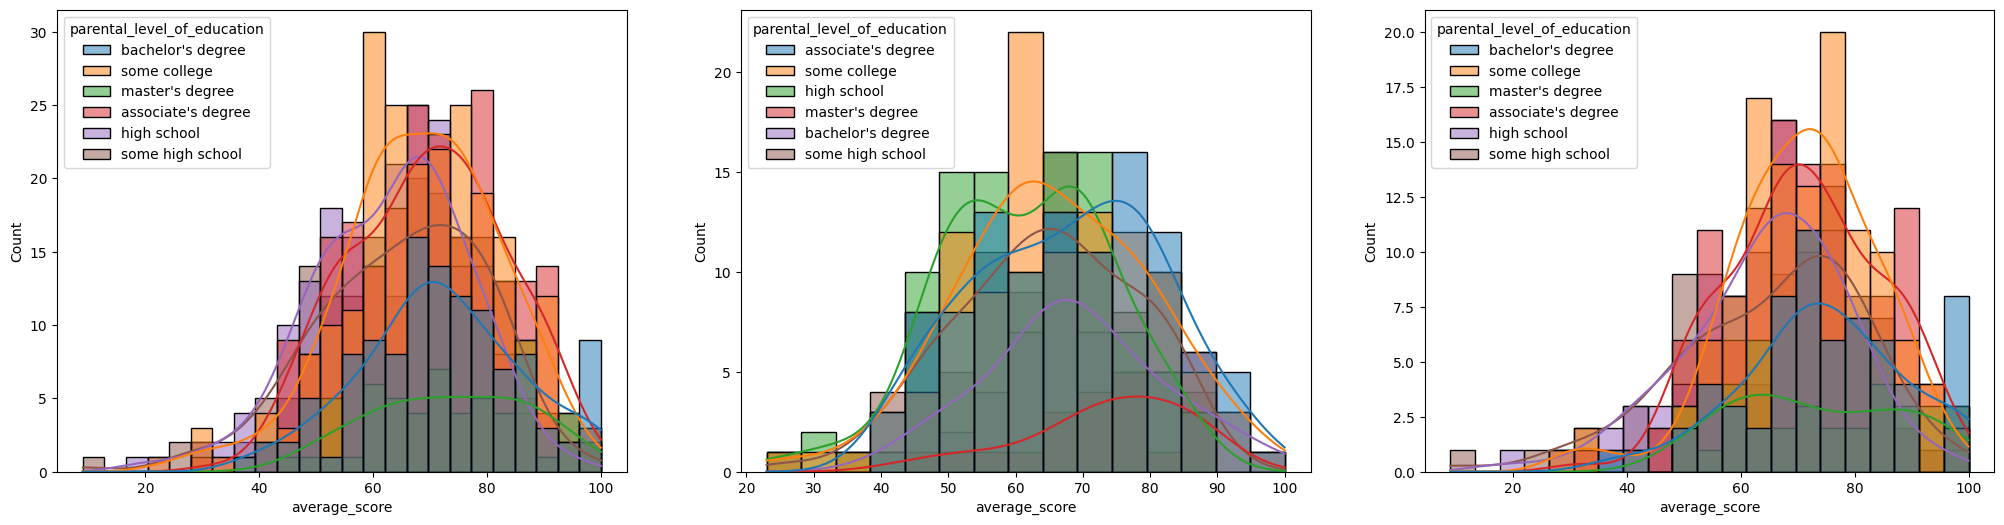

In [46]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.show()

- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

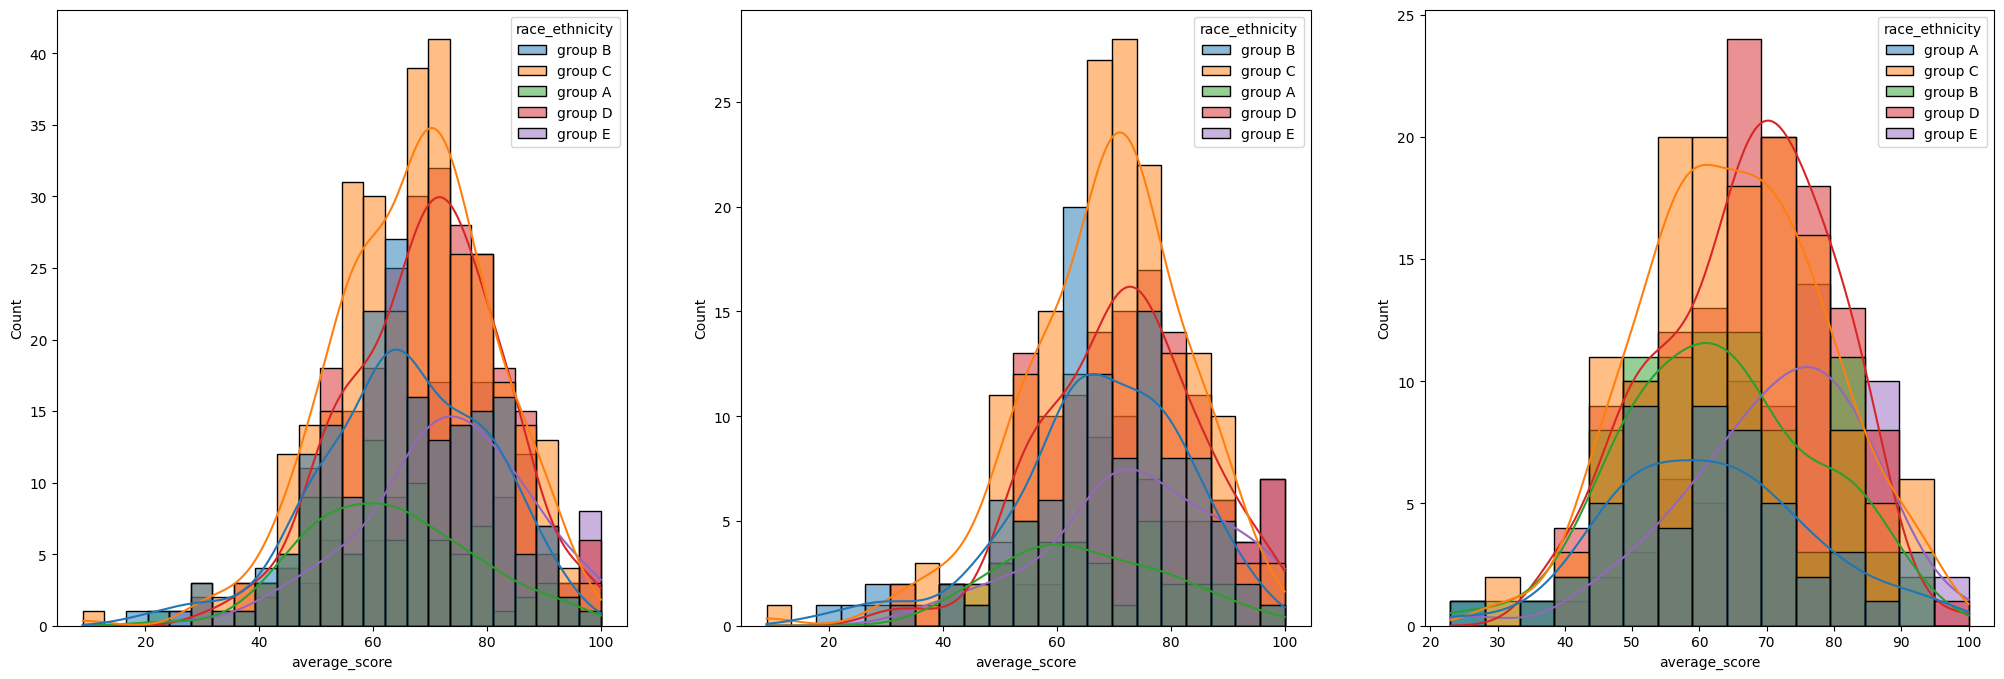

In [50]:
plt.subplots(1,3,figsize=(25,8))
plt.subplot(131)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='race_ethnicity')
plt.show()


- Students of group A and B perform poorly comparitively.
- Students of group A and B tend to perform poorly irrespective of their gender.

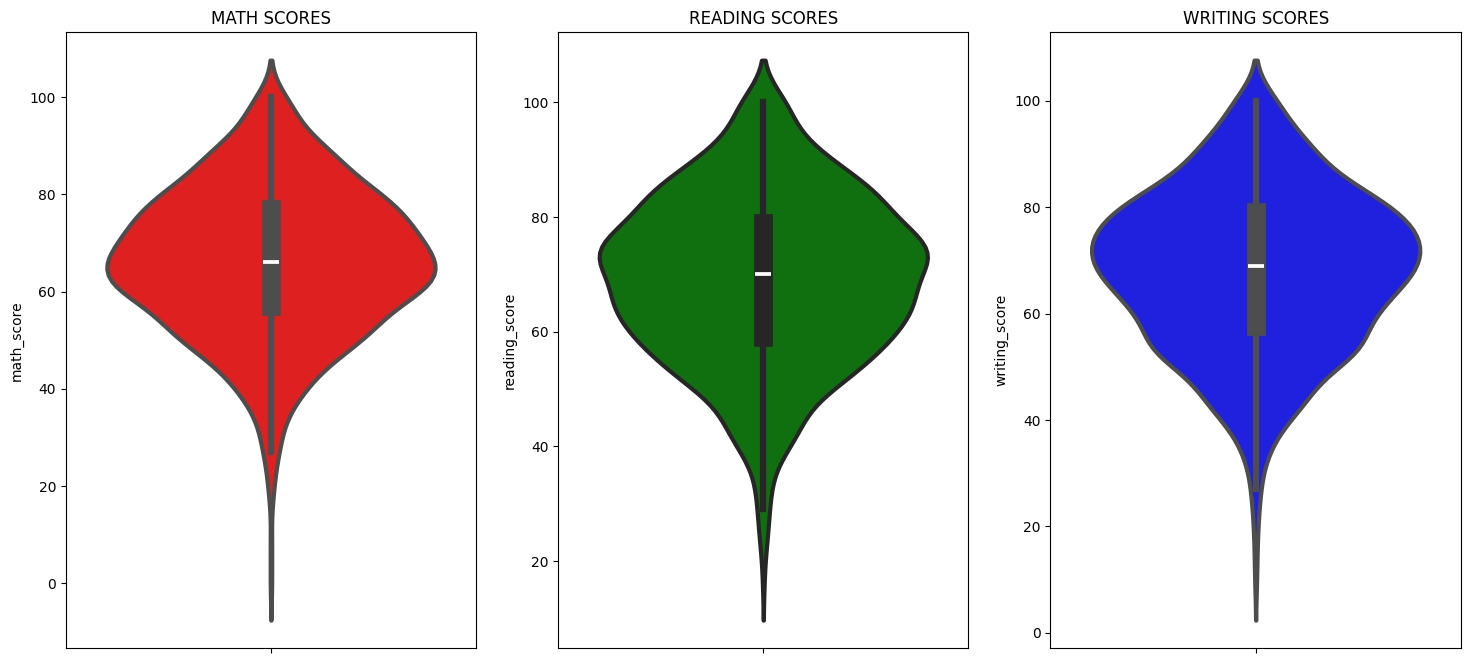

In [52]:
plt.figure(figsize=(18,8))
plt.subplot(131)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(132)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(133)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)

plt.show()

- The similar shapes across subjects suggest that student performance is relatively consistent across math, reading, and writing.
- The median scores appears to be similar across subjects, roughly around 70.
- The majority of scores appear to cluster between approximately 60-80

# 4.3 Multivariate Analysis using Pieplot

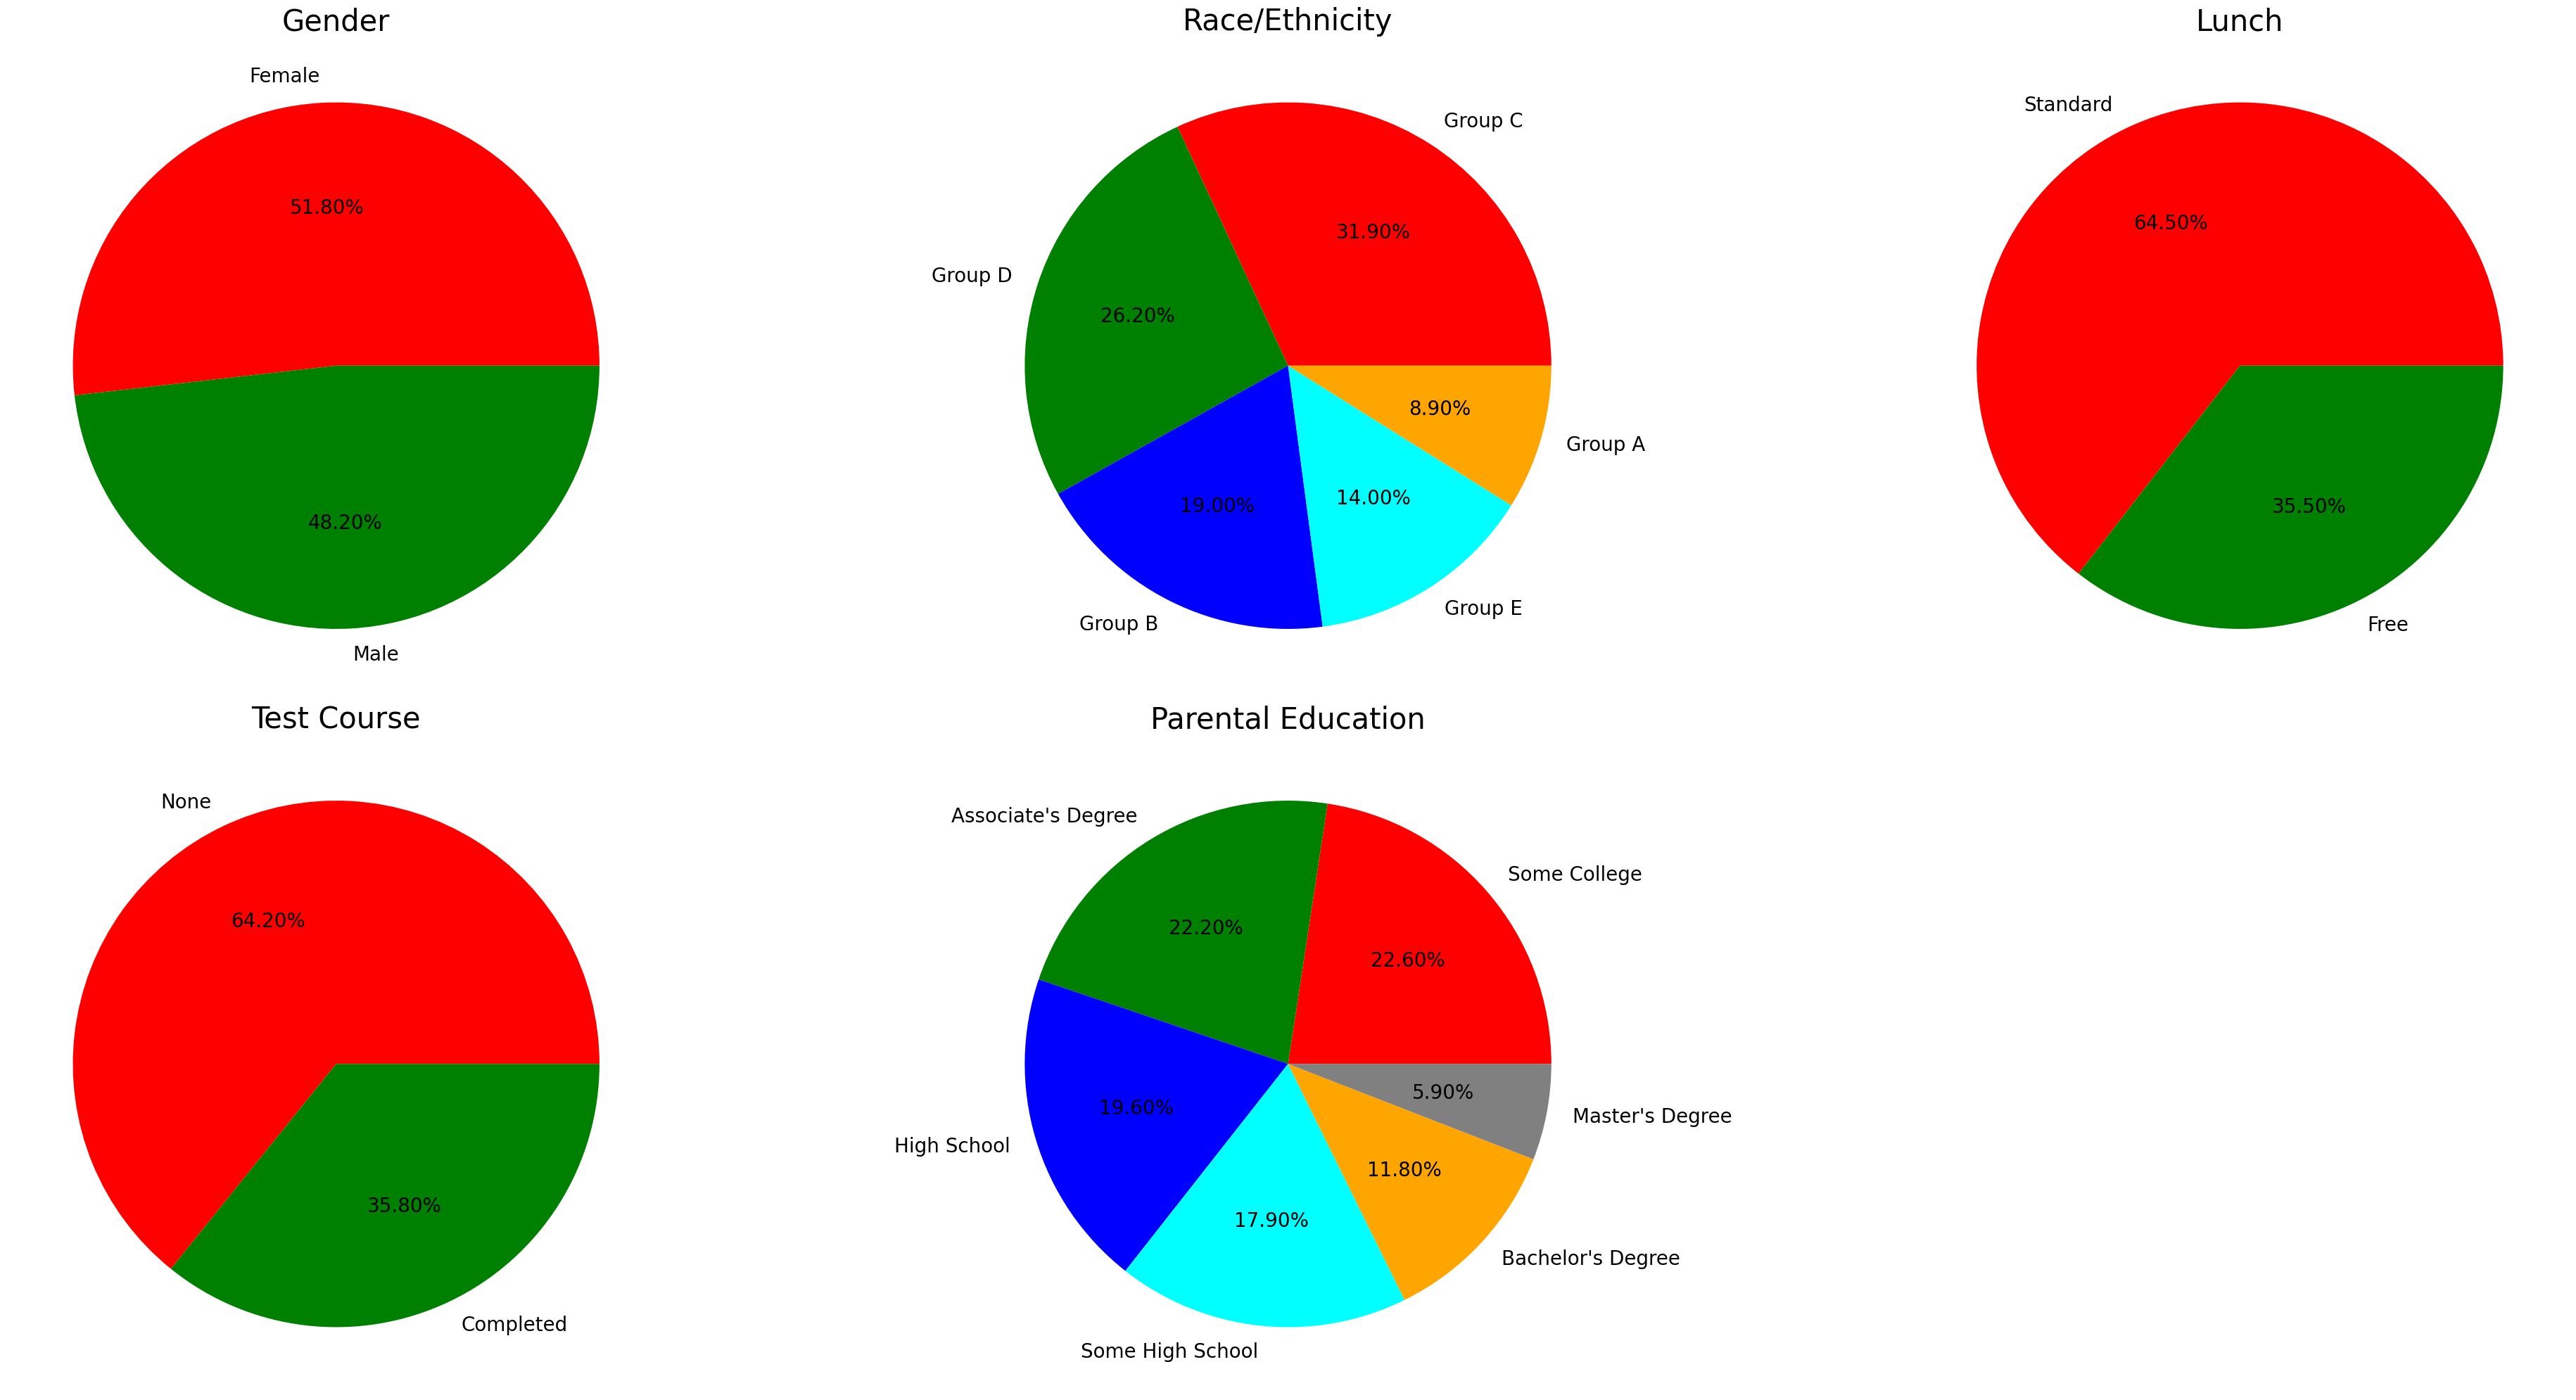

In [63]:
plt.rcParams['figure.figsize'] = (40, 20)

plt.subplot(231)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels, textprops={'fontsize': 20}, autopct = '%.2f%%')
plt.title('Gender', fontsize = 30)
plt.axis('off')



plt.subplot(232)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels, textprops={'fontsize': 20}, autopct = '%.2f%%')
plt.title('Race/Ethnicity', fontsize = 30)
plt.axis('off')



plt.subplot(233)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels, textprops={'fontsize': 20},autopct = '%.2f%%')
plt.title('Lunch', fontsize = 30)
plt.axis('off')


plt.subplot(234)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels, textprops={'fontsize': 20}, autopct = '%.2f%%')
plt.title('Test Course', fontsize = 30)
plt.axis('off')


plt.subplot(235)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels, textprops={'fontsize': 20} ,autopct = '%.2f%%')
plt.title('Parental Education', fontsize = 30)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

# 4.4 Feature Wise Visualization

### 4.4.1 Gender Column

- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

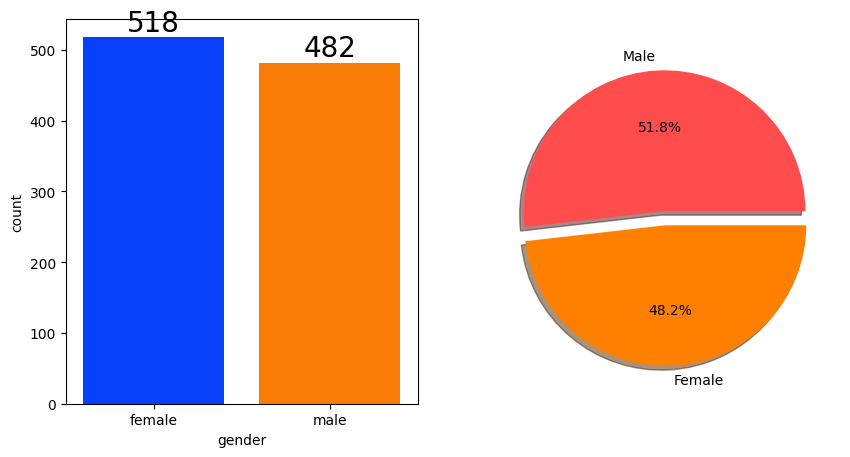

In [65]:
f,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()